# Building regressions

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing # puts the features in standard format
from sklearn import pipeline # 


## Import dataframe

In [2]:
df = pd.read_csv('csv_files/final_with_logs.csv')

In [3]:
df.head()

,County,Obesity,Min Wage,Life expectancy 2010,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,Alaska,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies,log_PA,log_NPA,log_TA
0,Autauga County,30.5,7.25,75.74,25.8,1706,12399,14105,8.9,0,...,0,0,0,0,0,0,0,7.441907,9.425371,9.554285
1,Baldwin County,26.6,7.25,77.80,23.0,3236,34173,37409,10.0,0,...,0,0,0,0,0,0,0,8.082093,10.439191,10.529667
2,Baldwin County,32.0,7.25,77.80,23.0,3236,34173,37409,10.0,0,...,0,0,0,0,0,0,0,8.082093,10.439191,10.529667
3,Barbour County,37.3,7.25,75.34,26.8,2137,9847,11984,12.3,0,...,0,0,0,0,0,0,0,7.667158,9.194922,9.391328
4,Barbour County,31.9,7.25,75.34,26.8,2137,9847,11984,12.3,0,...,0,0,0,1,0,0,0,7.667158,9.194922,9.391328


### Split Data into features and Target 

In [4]:
# Putting continuous variables together by grabbing log-ed values putting them on the first columns
cols = df.columns.tolist()
cols
first = cols[:-3] 
second = cols[-3:]
log_first = second + first
log_first
df = df[log_first]
df

,log_PA,log_NPA,log_TA,County,Obesity,Min Wage,Life expectancy 2010,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
0,7.441907,9.425371,9.554285,Autauga County,30.5,7.25,75.74,25.8,1706,12399,...,0,0,0,0,0,0,0,0,0,0
1,8.082093,10.439191,10.529667,Baldwin County,26.6,7.25,77.80,23.0,3236,34173,...,0,0,0,0,0,0,0,0,0,0
2,8.082093,10.439191,10.529667,Baldwin County,32.0,7.25,77.80,23.0,3236,34173,...,0,0,0,0,0,0,0,0,0,0
3,7.667158,9.194922,9.391328,Barbour County,37.3,7.25,75.34,26.8,2137,9847,...,0,0,0,0,0,0,0,0,0,0
4,7.667158,9.194922,9.391328,Barbour County,31.9,7.25,75.34,26.8,2137,9847,...,0,0,0,0,0,0,1,0,0,0
5,7.085901,8.772300,8.942199,Bibb County,34.3,7.25,74.13,30.1,1195,6453,...,0,0,0,0,0,0,0,0,0,0
6,7.085901,8.772300,8.942199,Bibb County,30.3,7.25,74.13,30.1,1195,6453,...,0,0,0,0,0,0,0,0,0,0
7,7.623642,9.576025,9.708749,Blount County,30.4,7.25,76.41,27.9,2046,14415,...,0,0,0,0,0,0,0,0,0,0
8,7.623642,9.576025,9.708749,Blount County,31.9,7.25,76.41,27.9,2046,14415,...,1,0,0,0,0,0,0,0,0,0
9,7.080868,8.398410,8.635687,Bullock County,42.1,7.25,73.61,28.0,1189,4440,...,0,0,0,0,0,0,0,0,0,0


In [5]:
target = df['Life expectancy 2010'] # making target = to life expectancy column

features = df.drop(columns=['Life expectancy 2010', 'County']) # taking target out of dataframe

#features = df_no_target.iloc[:] # setting features = to all columns left after taking target out

features.head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
0,7.441907,9.425371,9.554285,30.5,7.25,25.8,1706,12399,14105,8.9,...,0,0,0,0,0,0,0,0,0,0
1,8.082093,10.439191,10.529667,26.6,7.25,23.0,3236,34173,37409,10.0,...,0,0,0,0,0,0,0,0,0,0
2,8.082093,10.439191,10.529667,32.0,7.25,23.0,3236,34173,37409,10.0,...,0,0,0,0,0,0,0,0,0,0
3,7.667158,9.194922,9.391328,37.3,7.25,26.8,2137,9847,11984,12.3,...,0,0,0,0,0,0,0,0,0,0
4,7.667158,9.194922,9.391328,31.9,7.25,26.8,2137,9847,11984,12.3,...,0,0,0,0,0,0,1,0,0,0


In [6]:
# Assigning the non-dummy variables to a new dataframe to scale the variables correctly 
# THe dummy variables are either 0 or 1, which would affect our scale
features_no_dummy = features.iloc[:, 0:10]
features_no_dummy.head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010
0,7.441907,9.425371,9.554285,30.5,7.25,25.8,1706,12399,14105,8.9
1,8.082093,10.439191,10.529667,26.6,7.25,23.0,3236,34173,37409,10.0
2,8.082093,10.439191,10.529667,32.0,7.25,23.0,3236,34173,37409,10.0
3,7.667158,9.194922,9.391328,37.3,7.25,26.8,2137,9847,11984,12.3
4,7.667158,9.194922,9.391328,31.9,7.25,26.8,2137,9847,11984,12.3


In [7]:
# first step to split the data into test and train data
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=32,test_size=0.2)

In [8]:
# Makes the features standardized
#by removing the mean and scaling to unit variance
#instantiating a scaler
scaler = preprocessing.StandardScaler()

### Scale Train and Test Data

In [9]:
# Gets mean and std for later scaling
# passing in our training data set with out dummies
X_train_no_dummy = X_train.iloc[:, 0:10]
X_train_no_dummy.head()

scaler.fit(X_train_no_dummy) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
# Gets mean and std for later scaling for test data
# passing in our test data set with out dummies
X_test_no_dummy = X_test.iloc[:, 0:10]
X_test_no_dummy.head()

scaler.fit(X_test_no_dummy) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
# Actually creating a new dataframe only containing the scaled x training values (ie x training values w/o dummies)
X_train_scaled_no_dummy = pd.DataFrame(scaler.transform(X_train_no_dummy), columns=X_train_no_dummy.columns, index=X_train_no_dummy.index)

# Just getting the dummies from the x training data
X_train_only_dums = X_train.iloc[:,10:]

# Joining the non-dummy x training data w/the dummy x training data since we have now scaled everything that needs to be scaled in x training data
X_train_final = X_train_scaled_no_dummy.join(X_train_only_dums, how='outer').dropna()

# This is what it looks like
X_train_final.head()






,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
493,-1.082522,-0.921230,-1.083551,0.249947,-0.235347,0.476491,-0.169367,-0.302808,-0.282195,-0.737519,...,0,0,0,0,0,0,0,0,0,0
1435,0.276322,0.114400,0.087552,0.047589,-0.235347,-0.012464,-0.127044,-0.196159,-0.188641,0.049203,...,0,0,0,0,0,0,0,0,0,0
1885,-0.277298,-0.486183,-0.565070,0.882314,-0.235347,1.505870,-0.155601,-0.275777,-0.257459,-0.154762,...,0,0,0,0,0,0,0,0,0,0
1855,-1.044594,0.234940,0.119833,1.944692,-0.235347,0.759570,-0.169051,-0.170127,-0.183430,0.049203,...,0,0,0,0,0,0,0,0,0,0
2202,0.051493,-0.311611,-0.344645,-2.254229,-0.235347,-1.093313,-0.141887,-0.259204,-0.240518,-1.262001,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Actually creating a new dataframe only containing the scaled x test values (ie x test values w/o dummies)
X_test_scaled_no_dummy = pd.DataFrame(scaler.transform(X_test_no_dummy), columns=X_test_no_dummy.columns, index=X_test_no_dummy.index)

# Just getting the dummies from the x test data
X_test_only_dums = X_test.iloc[:,10:]

# Joining the non-dummy x test data w/the dummy x test data since we have now scaled everything that needs to be scaled in x test data
X_test_final = X_test_scaled_no_dummy.join(X_test_only_dums, how='outer').dropna()

# This is what it looks like
X_test_final.head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
1304,-0.133089,-0.118535,-0.193539,0.376420,-0.235347,0.244880,-0.150504,-0.235326,-0.225664,-0.912346,...,0,0,0,0,0,0,0,0,0,0
2841,-0.948672,0.400732,0.297340,-0.205358,-0.235347,-0.707295,-0.168158,-0.126107,-0.150397,-0.329589,...,0,1,0,0,0,0,0,0,0,0
1221,-0.177616,-0.152628,-0.232086,-0.559484,-0.235347,0.939711,-0.152212,-0.240037,-0.229743,2.147129,...,0,0,0,0,0,0,0,0,0,0
1840,-0.978044,-0.284755,-0.424986,0.806430,-0.235347,0.888242,-0.168447,-0.256265,-0.247277,-0.504416,...,0,0,0,0,0,0,0,0,0,0
1034,-0.446499,-1.376522,-1.376957,0.022294,-0.235347,0.862508,-0.160198,-0.317763,-0.290228,1.564372,...,0,0,0,0,0,0,0,0,0,0


### CREATING INTERACTION TERMS & POLYNOMIAL TERMS

In [13]:
# To create a Polynomial and interaction terms of all variables 
poly = preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Pass in scaled x training with dummies
poly_X_train = pd.DataFrame(poly.fit_transform(X_train_final), columns=poly.get_feature_names(X_train_final.columns))

# To see all the columns
pd.set_option('display.max_columns', 500)

# Check out the data
poly_X_train.head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies,log_PA^2,log_PA log_NPA,log_PA log_TA,log_PA Obesity,log_PA Min Wage,log_PA Percent Smokers,log_PA Jan & July Public Assist. Participation,log_PA Jan & July Non-Public Assist. Participation,log_PA Jan & July TOTAL Assist. Participation,log_PA Unemployment_rate_2010,log_PA Alaska,log_PA Arizona,log_PA Arkansas,log_PA California,log_PA Colorado,log_PA Connecticut,log_PA Delaware,log_PA Florida,log_PA Georgia,log_PA Hawaii,log_PA Idaho,log_PA Illinois,log_PA Indiana,log_PA Iowa,log_PA Kansas,log_PA Kentucky,log_PA Louisiana,log_PA Maine,log_PA Maryland,log_PA Massachusetts,log_PA Michigan,log_PA Minnesota,log_PA Mississippi,log_PA Missouri,log_PA Montana,log_PA Nebraska,log_PA Nevada,log_PA New Hampshire,log_PA New Jersey,log_PA New Mexico,log_PA New York,log_PA North Carolina,log_PA North Dakota,log_PA Ohio,log_PA Oklahoma,log_PA Oregon,log_PA Pennsylvania,log_PA Rhode Island,log_PA South Carolina,log_PA South Dakota,log_PA Tennessee,log_PA Texas,log_PA Utah,log_PA Vermont,log_PA Virginia,log_PA Washington,log_PA West Virginia,log_PA Wisconsin,log_PA Wyoming,log_PA Min Wages Dummies,log_NPA^2,log_NPA log_TA,log_NPA Obesity,log_NPA Min Wage,log_NPA Percent Smokers,log_NPA Jan & July Public Assist. Participation,log_NPA Jan & July Non-Public Assist. Participation,log_NPA Jan & July TOTAL Assist. Participation,log_NPA Unemployment_rate_2010,log_NPA Alaska,log_NPA Arizona,log_NPA Arkansas,log_NPA California,log_NPA Colorado,log_NPA Connecticut,log_NPA Delaware,log_NPA Florida,log_NPA Georgia,log_NPA Hawaii,log_NPA Idaho,log_NPA Illinois,log_NPA Indiana,log_NPA Iowa,log_NPA Kansas,log_NPA Kentucky,log_NPA Louisiana,log_NPA Maine,log_NPA Maryland,log_NPA Massachusetts,log_NPA Michigan,log_NPA Minnesota,log_NPA Mississippi,log_NPA Missouri,log_NPA Montana,log_NPA Nebraska,log_NPA Nevada,log_NPA New Hampshire,log_NPA New Jersey,log_NPA New Mexico,log_NPA New York,log_NPA North Carolina,log_NPA North Dakota,log_NPA Ohio,log_NPA Oklahoma,log_NPA Oregon,log_NPA Pennsylvania,log_NPA Rhode Island,log_NPA South Carolina,log_NPA South Dakota,log_NPA Tennessee,log_NPA Texas,log_NPA Utah,log_NPA Vermont,log_NPA Virginia,log_NPA Washington,log_NPA West Virginia,log_NPA Wisconsin,log_NPA Wyoming,log_NPA Min Wages Dummies,log_TA^2,log_TA Obesity,log_TA Min Wage,log_TA Percent Smokers,log_TA Jan & July Public Assist. Participation,log_TA Jan & July Non-Public Assist. Participation,log_TA Jan & July TOTAL Assist. Participation,log_TA Unemployment_rate_2010,log_TA Alaska,log_TA Arizona,log_TA Arkansas,log_TA California,log_TA Colorado,log_TA Connecticut,log_TA Delaware,log_TA Florida,log_TA Georgia,log_TA Hawaii,log_TA Idaho,log_TA Illinois,log_TA Indiana,log_TA Iowa,log_TA Kansas,log_TA Kentucky,log_TA Louisiana,log_TA Maine,log_TA Maryland,log_TA Massachusetts,log_TA Michigan,log_TA Minnesota,log_TA Mississippi,log_TA Missouri,log_TA Montana,log_TA Nebraska,log_TA Nevada,log_TA New Hampshire,log_TA New Jersey,log_TA New Mexico,log_TA New York,log_TA North Carolina,log_TA North Dakota,log_TA Ohio,log_TA Oklahoma,log_TA Oregon,log_TA Pennsylvania,log_TA Rhode Island,log_TA South Carolina,log_TA South Dakota,log_TA Tennessee,log_TA Texas,log_TA Utah,log_TA Vermont,log_TA Virginia,log_TA Washington,log_TA West Virginia,log_TA Wisconsin,log_TA Wyoming,log_TA Min Wages Dummies,Obesity

In [14]:

# Pass in scaled x test with dummies
poly_X_test = pd.DataFrame(poly.fit_transform(X_test_final), columns=poly.get_feature_names(X_test_final.columns))

# To see all the columns
pd.set_option('display.max_columns', 500)

# Check out the data
poly_X_test.head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies,log_PA^2,log_PA log_NPA,log_PA log_TA,log_PA Obesity,log_PA Min Wage,log_PA Percent Smokers,log_PA Jan & July Public Assist. Participation,log_PA Jan & July Non-Public Assist. Participation,log_PA Jan & July TOTAL Assist. Participation,log_PA Unemployment_rate_2010,log_PA Alaska,log_PA Arizona,log_PA Arkansas,log_PA California,log_PA Colorado,log_PA Connecticut,log_PA Delaware,log_PA Florida,log_PA Georgia,log_PA Hawaii,log_PA Idaho,log_PA Illinois,log_PA Indiana,log_PA Iowa,log_PA Kansas,log_PA Kentucky,log_PA Louisiana,log_PA Maine,log_PA Maryland,log_PA Massachusetts,log_PA Michigan,log_PA Minnesota,log_PA Mississippi,log_PA Missouri,log_PA Montana,log_PA Nebraska,log_PA Nevada,log_PA New Hampshire,log_PA New Jersey,log_PA New Mexico,log_PA New York,log_PA North Carolina,log_PA North Dakota,log_PA Ohio,log_PA Oklahoma,log_PA Oregon,log_PA Pennsylvania,log_PA Rhode Island,log_PA South Carolina,log_PA South Dakota,log_PA Tennessee,log_PA Texas,log_PA Utah,log_PA Vermont,log_PA Virginia,log_PA Washington,log_PA West Virginia,log_PA Wisconsin,log_PA Wyoming,log_PA Min Wages Dummies,log_NPA^2,log_NPA log_TA,log_NPA Obesity,log_NPA Min Wage,log_NPA Percent Smokers,log_NPA Jan & July Public Assist. Participation,log_NPA Jan & July Non-Public Assist. Participation,log_NPA Jan & July TOTAL Assist. Participation,log_NPA Unemployment_rate_2010,log_NPA Alaska,log_NPA Arizona,log_NPA Arkansas,log_NPA California,log_NPA Colorado,log_NPA Connecticut,log_NPA Delaware,log_NPA Florida,log_NPA Georgia,log_NPA Hawaii,log_NPA Idaho,log_NPA Illinois,log_NPA Indiana,log_NPA Iowa,log_NPA Kansas,log_NPA Kentucky,log_NPA Louisiana,log_NPA Maine,log_NPA Maryland,log_NPA Massachusetts,log_NPA Michigan,log_NPA Minnesota,log_NPA Mississippi,log_NPA Missouri,log_NPA Montana,log_NPA Nebraska,log_NPA Nevada,log_NPA New Hampshire,log_NPA New Jersey,log_NPA New Mexico,log_NPA New York,log_NPA North Carolina,log_NPA North Dakota,log_NPA Ohio,log_NPA Oklahoma,log_NPA Oregon,log_NPA Pennsylvania,log_NPA Rhode Island,log_NPA South Carolina,log_NPA South Dakota,log_NPA Tennessee,log_NPA Texas,log_NPA Utah,log_NPA Vermont,log_NPA Virginia,log_NPA Washington,log_NPA West Virginia,log_NPA Wisconsin,log_NPA Wyoming,log_NPA Min Wages Dummies,log_TA^2,log_TA Obesity,log_TA Min Wage,log_TA Percent Smokers,log_TA Jan & July Public Assist. Participation,log_TA Jan & July Non-Public Assist. Participation,log_TA Jan & July TOTAL Assist. Participation,log_TA Unemployment_rate_2010,log_TA Alaska,log_TA Arizona,log_TA Arkansas,log_TA California,log_TA Colorado,log_TA Connecticut,log_TA Delaware,log_TA Florida,log_TA Georgia,log_TA Hawaii,log_TA Idaho,log_TA Illinois,log_TA Indiana,log_TA Iowa,log_TA Kansas,log_TA Kentucky,log_TA Louisiana,log_TA Maine,log_TA Maryland,log_TA Massachusetts,log_TA Michigan,log_TA Minnesota,log_TA Mississippi,log_TA Missouri,log_TA Montana,log_TA Nebraska,log_TA Nevada,log_TA New Hampshire,log_TA New Jersey,log_TA New Mexico,log_TA New York,log_TA North Carolina,log_TA North Dakota,log_TA Ohio,log_TA Oklahoma,log_TA Oregon,log_TA Pennsylvania,log_TA Rhode Island,log_TA South Carolina,log_TA South Dakota,log_TA Tennessee,log_TA Texas,log_TA Utah,log_TA Vermont,log_TA Virginia,log_TA Washington,log_TA West Virginia,log_TA Wisconsin,log_TA Wyoming,log_TA Min Wages Dummies,Obesity

# Feature Selection Methods

## Checking for Multicollinearity of Features

In [15]:
# This is a matrix of graphs that is too large to run

#pd.plotting.scatter_matrix(X_train_final,figsize  = [9, 9]);

In [16]:
# Might come back to this, but just go to Filter method
X_train_final.corr().head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Min Wages Dummies
log_PA,1.000000,0.718922,0.809418,0.055970,0.006742,0.006138,0.349576,0.517238,0.533124,0.025026,0.021999,-0.048185,-0.028313,-0.113295,0.036041,0.044798,0.046776,-0.029896,0.031258,0.015988,0.036675,0.042343,0.027136,0.029234,0.015628,-0.007425,-0.059705,0.026502,-0.022084,-0.041628,-0.048866,0.010995,0.040124,0.039439,0.003036,-0.005246,0.002824,0.003214,0.022194,-0.046099,-0.051628,-0.056488,-0.050999,0.061314,0.043574,-0.000247,0.024716,0.015537,-0.006538,-0.025927,0.045625,-0.021549,0.068246,0.025357,0.040217,-0.005992,-0.028778,-0.129371,-0.052569,-0.025611
log_NPA,0.718922,1.000000,0.970415,0.048882,0.023745,0.058108,0.242611,0.582845,0.534416,0.037076,0.058054,-0.004440,0.044609,-0.028282,0.060045,0.014800,0.031837,-0.041335,0.012207,0.006865,0.026576,0.049854,0.029654,0.020544,0.009716,0.040799,-0.033989,0.042618,0.002991,-0.002412,-0.006857,0.034235,0.024553,0.021869,-0.025221,-0.019123,-0.006755,-0.022819,0.030938,-0.089397,-0.100838,-0.036975,0.006979,0.040825,0.025947,-0.035900,-0.054816,-0.003537,-0.054330,-0.008054,0.040099,-0.101260,0.029571,0.007079,0.041504,0.021144,0.010861,-0.041567,-0.045072,0.004217
log_TA,0.809418,0.970415,1.000000,0.052746,0.018822,0.042066,0.326402,0.607139,0.588992,0.031469,0.056031,-0.010759,0.034365,-0.042505,0.060721,0.019581,0.036525,-0.047108,0.024763,0.007465,0.027905,0.046671,0.025652,0.017336,0.006860,0.033715,-0.041912,0.041526,-0.000804,-0.008336,-0.013581,0.030480,0.023475,0.020364,-0.026322,-0.022941,-0.007840,-0.022406,0.030544,-0.090033,-0.102431,-0.043857,-0.001344,0.041350,0.025845,-0.033411,-0.043517,-0.001360,-0.041142,-0.012810,0.040274,-0.059350,0.052151,0.007993,0.039225,0.016251,0.004451,-0.053553,-0.049751,-0.005774
Obesity,0.055970,0.048882,0.052746,1.000000,-0.155622,0.424112,-0.023224,-0.000280,-0.010387,0.134970,0.006825,-0.037527,0.116812,-0.192188,-0.342705,-0.077116,-0.002041,-0.022870,0.041502,-0.051333,-0.090750,-0.032094,0.046160,0.003429,0.080229,0.128905,0.165520,-0.027295,-0.014442,-0.108260,0.053502,-0.075181,0.231919,0.062575,-0.148445,-0.001276,-0.061571,-0.053608,-0.114811,-0.116317,-0.118621,-0.009774,0.021711,0.032160,0.094525,-0.088098,-0.011451,-0.069756,0.127115,0.071221,0.089389,-0.059331,-0.116596,-0.078926,-0.004313,-0.015530,0.107594,-0.035510,-0.105477,-0.322182
Min Wage,0.006742,0.023745,0.018822,-0.155622,1.000000,-0.117828,-0.001566,0.010744,0.007204,0.102608,0.061748,0.076979,-0.045280,0.224987,0.161190,0.123665,-0.007901,0.172932,-0.062476,-0.007901,-0.032796,-0.050468,-0.047763,-0.051125,-0.052417,-0.052417,-0.037817,0.027041,-0.023783,0.101014,-0.045642,-0.046002,-0.044178,-0.003390,-0.039082,-0.048452,-0.020957,-0.015822,-0.023783,0.037593,-0.041505,-0.051450,-0.035617,0.213913,-0.043430,0.474096,-0.040310,0.045986,-0.033281,-0.043430,-0.052417,-0.080644,-0.027496,-0.018565,-0.047416,0.554091,-0.039082,-0.041505,-0.477182,0.734937


## Filter Methods

In [17]:
from sklearn.feature_selection import VarianceThreshold

In [18]:
thresholder = VarianceThreshold(threshold=.5)

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [19]:
features_selected_train = variance_threshold_selector(poly_X_train)

In [20]:
features_selected_train.head()

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,log_PA^2,log_PA log_NPA,log_PA log_TA,log_PA Obesity,log_PA Min Wage,log_PA Percent Smokers,log_PA Jan & July Public Assist. Participation,log_PA Jan & July Non-Public Assist. Participation,log_PA Jan & July TOTAL Assist. Participation,log_PA Unemployment_rate_2010,log_NPA^2,log_NPA log_TA,log_NPA Obesity,log_NPA Min Wage,log_NPA Percent Smokers,log_NPA Jan & July Public Assist. Participation,log_NPA Jan & July Non-Public Assist. Participation,log_NPA Jan & July TOTAL Assist. Participation,log_NPA Unemployment_rate_2010,log_TA^2,log_TA Obesity,log_TA Min Wage,log_TA Percent Smokers,log_TA Jan & July Public Assist. Participation,log_TA Jan & July Non-Public Assist. Participation,log_TA Jan & July TOTAL Assist. Participation,log_TA Unemployment_rate_2010,Obesity^2,Obesity Min Wage,Obesity Percent Smokers,Obesity Jan & July Non-Public Assist. Participation,Obesity Jan & July TOTAL Assist. Participation,Obesity Unemployment_rate_2010,Min Wage^2,Min Wage Percent Smokers,Min Wage Unemployment_rate_2010,Min Wage Min Wages Dummies,Percent Smokers^2,Percent Smokers Jan & July Public Assist. Participation,Percent Smokers Jan & July TOTAL Assist. Participation,Percent Smokers Unemployment_rate_2010,Jan & July Public Assist. Participation^2,Jan & July Public Assist. Participation Jan & July Non-Public Assist. Participation,Jan & July Public Assist. Participation Jan & July TOTAL Assist. Participation,Jan & July Public Assist. Participation Texas,Jan & July Non-Public Assist. Participation^2,Jan & July Non-Public Assist. Participation Jan & July TOTAL Assist. Participation,Jan & July TOTAL Assist. Participation^2,Unemployment_rate_2010^2
0,-1.082522,-0.921230,-1.083551,0.249947,-0.235347,0.476491,-0.169367,-0.302808,-0.282195,-0.737519,1.171853,0.997251,1.172968,-0.270573,0.254768,-0.515812,0.183343,0.327796,0.305482,0.798381,0.848664,0.998199,-0.230258,0.216808,-0.438957,0.156025,0.278956,0.259966,0.679424,1.174083,-0.270830,0.255010,-0.516302,0.183517,0.328108,0.305772,0.799140,0.062473,-0.058824,0.119097,-0.075686,-0.070534,-0.184340,0.055388,-0.112141,0.173573,-0.0,0.227043,-0.080702,-0.134463,-0.351421,0.028685,0.051286,0.047794,-0.0,0.091693,0.085451,0.079634,0.543934
1,0.276322,0.114400,0.087552,0.047589,-0.235347,-0.012464,-0.127044,-0.196159,-0.188641,0.049203,0.076354,0.031611,0.024192,0.013150,-0.065032,-0.003444,-0.035105,-0.054203,-0.052126,0.013596,0.013087,0.010016,0.005444,-0.026924,-0.001426,-0.014534,-0.022441,-0.021581,0.005629,0.007665,0.004167,-0.020605,-0.001091,-0.011123,-0.017174,-0.016516,0.004308,0.002265,-0.011200,-0.000593,-0.009335,-0.008977,0.002342,0.055388,0.002933,-0.011580,-0.0,0.000155,0.001584,0.002351,-0.000613,0.016140,0.024921,0.023966,-0.0,0.038478,0.037004,0.035585,0.002421
2,-0.277298,-0.486183,-0.565070,0.882314,-0.235347,1.505870,-0.155601,-0.275777,-0.257459,-0.154762,0.076894,0.134818,0.156693,-0.244664,0.065261,-0.417575,0.043148,0.076473,0.071393,0.042915,0.236374,0.274727,-0.428966,0.114422,-0.732128,0.075650,0.134078,0.125172,0.075243,0.319304,-0.498569,0.132987,-0.850921,0.087925,0.155833,0.145482,0.087451,0.778478,-0.207650,1.328650,-0.243322,-0.227160,-0.136549,0.055388,-0.354402,0.036423,-0.0,2.267644,-0.234314,-0.387700,-0.233051,0.024212,0.042911,0.040061,-0.0,0.076053,0.071001,0.066285,0.023951
3,-1.044594,0.234940,0.119833,1.944692,-0.235347,0.759570,-0.169051,-0.170127,-0.183430,0.049203,1.091177,-0.245417,-0.125176,-2.031414,0.245842,-0.793443,0.176590,0.177714,0.191610,-0.051397,0.055197,0.028154,0.456886,-0.055292,0.178454,-0.039717,-0.039970,-0.043095,0.011560,0.014360,0.233038,-0.028202,0.091021,-0.020258,-0.020387,-0.021981,0.005896,3.781826,-0.457677,1.477129,-0.330845,-0.356716,0.095685,0.055388,-0.178762,-0.011580,-0.0,0.576947,-0.128406,-0.139328,0.037373,0.028578,0.028760,

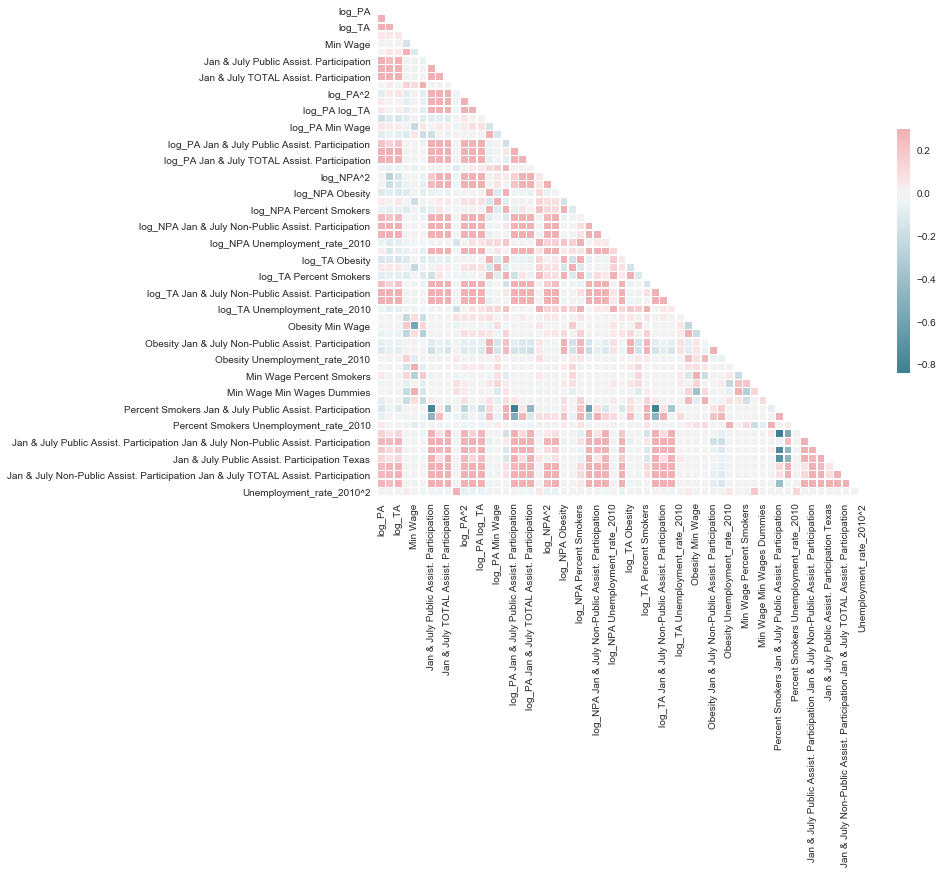

In [21]:
import seaborn as sns

sns.set(style="white")

# Compute the correlation matrix
corr = features_selected_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [22]:
# Create correlation matrix
corr_matrix = features_selected_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [23]:
# Looking at the upper triangle of the correlation matrix
upper

,log_PA,log_NPA,log_TA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,log_PA^2,log_PA log_NPA,log_PA log_TA,log_PA Obesity,log_PA Min Wage,log_PA Percent Smokers,log_PA Jan & July Public Assist. Participation,log_PA Jan & July Non-Public Assist. Participation,log_PA Jan & July TOTAL Assist. Participation,log_PA Unemployment_rate_2010,log_NPA^2,log_NPA log_TA,log_NPA Obesity,log_NPA Min Wage,log_NPA Percent Smokers,log_NPA Jan & July Public Assist. Participation,log_NPA Jan & July Non-Public Assist. Participation,log_NPA Jan & July TOTAL Assist. Participation,log_NPA Unemployment_rate_2010,log_TA^2,log_TA Obesity,log_TA Min Wage,log_TA Percent Smokers,log_TA Jan & July Public Assist. Participation,log_TA Jan & July Non-Public Assist. Participation,log_TA Jan & July TOTAL Assist. Participation,log_TA Unemployment_rate_2010,Obesity^2,Obesity Min Wage,Obesity Percent Smokers,Obesity Jan & July Non-Public Assist. Participation,Obesity Jan & July TOTAL Assist. Participation,Obesity Unemployment_rate_2010,Min Wage^2,Min Wage Percent Smokers,Min Wage Unemployment_rate_2010,Min Wage Min Wages Dummies,Percent Smokers^2,Percent Smokers Jan & July Public Assist. Participation,Percent Smokers Jan & July TOTAL Assist. Participation,Percent Smokers Unemployment_rate_2010,Jan & July Public Assist. Participation^2,Jan & July Public Assist. Participation Jan & July Non-Public Assist. Participation,Jan & July Public Assist. Participation Jan & July TOTAL Assist. Participation,Jan & July Public Assist. Participation Texas,Jan & July Non-Public Assist. Participation^2,Jan & July Non-Public Assist. Participation Jan & July TOTAL Assist. Participation,Jan & July TOTAL Assist. Participation^2,Unemployment_rate_2010^2
log_PA,NaN,0.718922,0.809418,0.055970,0.006742,0.006138,0.349576,0.517238,0.533124,0.025026,0.093848,0.039147,0.063158,0.174064,0.058635,0.093810,0.215049,0.286644,0.309361,0.051535,0.017913,0.009103,0.118806,0.041348,0.062488,0.272032,0.311481,0.329460,0.053550,0.035941,0.136854,0.039789,0.082901,0.233715,0.308456,0.332998,0.052694,0.011570,0.003728,0.057852,0.088664,0.114118,0.031043,0.042411,0.047163,0.051576,0.020607,0.080330,0.126771,0.066796,0.042411,0.135009,0.262813,0.182542,0.129013,0.253557,0.259136,0.273020,0.003191
log_NPA,NaN,NaN,0.970415,0.048882,0.023745,0.058108,0.242611,0.582845,0.534416,0.037076,0.040470,0.003355,0.004960,0.117517,0.035024,0.058637,0.134476,0.328608,0.289438,0.054592,0.278363,0.187974,0.089204,0.031132,0.078002,0.208804,0.304112,0.303402,0.102741,0.143257,0.121118,0.042589,0.071470,0.140210,0.315604,0.291384,0.093098,0.026206,0.014076,0.052666,0.053830,0.074198,0.025583,0.029571,0.007973,0.026489,0.002515,0.015246,0.049086,0.000166,0.013687,0.063376,0.250308,0.114599,0.065988,0.273974,0.272744,0.240967,0.034744
log_TA,NaN,NaN,NaN,0.052746,0.018822,0.042066,0.326402,0.607139,0.588992,0.031469,0.069942,0.001514,0.033727,0.134236,0.035829,0.078457,0.206259,0.342975,0.340447,0.053313,0.153207,0.133135,0.120117,0.045415,0.072563,0.250446,0.332906,0.339161,0.092964,0.087090,0.139021,0.046701,0.079419,0.210675,0.336678,0.341312,0.078796,0.023904,0.013073,0.053005,0.063178,0.090588,0.015423,0.036024,0.015438,0.032689,0.005051,0.017521,0.108075,0.037888,0.009009,0.119500,0.275207,0.171271,0.115397,0.288098,0.289390,0.285399,0.038347
Obesity,NaN,NaN,NaN,NaN,0.155622,0.424112,0.023224,0.000280,0.010387,0.134970,0.095205,0.073713,0.079859,0.095309,0.007730,0.098443,0.022826,0.030554,0.032919,0.024587,0.029655,0.053585,0.108907,0.005061,0.098333,0.033501,0.013517,0.021274,0.039918,0.065082,0.120853,0.001421,0.102036,0.023832,0.016218,0.023265,0.030298,0.228541,0.180173,0.240984,0.027133,0.028299,0.143771,0.161772,0.123811,0.080593,0.221666,0.197182,0.000607,0.025489,0.001029,0.006701,0.022481,0.011209,0.002341,0.002246,0.006640,0.010904,0.043062
Min Wage,NaN,NaN,NaN,NaN,NaN,0.117828,0.0

In [24]:
# We drop the features that are highly correlated
to_drop

['log_TA',
 'log_PA Jan & July Public Assist. Participation',
 'log_NPA Jan & July Non-Public Assist. Participation',
 'log_NPA Jan & July TOTAL Assist. Participation',
 'log_TA^2',
 'log_TA Obesity',
 'log_TA Min Wage',
 'log_TA Percent Smokers',
 'log_TA Jan & July Public Assist. Participation',
 'log_TA Jan & July Non-Public Assist. Participation',
 'log_TA Jan & July TOTAL Assist. Participation',
 'log_TA Unemployment_rate_2010',
 'Obesity Jan & July TOTAL Assist. Participation',
 'Jan & July Public Assist. Participation Jan & July TOTAL Assist. Participation',
 'Jan & July Non-Public Assist. Participation^2',
 'Jan & July Non-Public Assist. Participation Jan & July TOTAL Assist. Participation',
 'Jan & July TOTAL Assist. Participation^2']

In [25]:
features_selected_train.drop(columns=to_drop, inplace=True)

/Users/roberthillery/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [27]:
def information_selector(X, y, scoring, k=5):
    selector = SelectKBest(score_func=scoring, k=k)
    selector.fit(X, y)
    return X[X.columns[selector.get_support(indices=True)]]

In [28]:
test = SelectKBest(score_func=mutual_info_regression, k=30)
fit = test.fit(features_selected_train, y_train)

In [29]:
features_selected_train[features_selected_train.columns[fit.get_support(indices=True)]]

features_selected_train.head()

,log_PA,log_NPA,Obesity,Min Wage,Percent Smokers,Jan & July Public Assist. Participation,Jan & July Non-Public Assist. Participation,Jan & July TOTAL Assist. Participation,Unemployment_rate_2010,log_PA^2,log_PA log_NPA,log_PA log_TA,log_PA Obesity,log_PA Min Wage,log_PA Percent Smokers,log_PA Jan & July Non-Public Assist. Participation,log_PA Jan & July TOTAL Assist. Participation,log_PA Unemployment_rate_2010,log_NPA^2,log_NPA log_TA,log_NPA Obesity,log_NPA Min Wage,log_NPA Percent Smokers,log_NPA Jan & July Public Assist. Participation,log_NPA Unemployment_rate_2010,Obesity^2,Obesity Min Wage,Obesity Percent Smokers,Obesity Jan & July Non-Public Assist. Participation,Obesity Unemployment_rate_2010,Min Wage^2,Min Wage Percent Smokers,Min Wage Unemployment_rate_2010,Min Wage Min Wages Dummies,Percent Smokers^2,Percent Smokers Jan & July Public Assist. Participation,Percent Smokers Jan & July TOTAL Assist. Participation,Percent Smokers Unemployment_rate_2010,Jan & July Public Assist. Participation^2,Jan & July Public Assist. Participation Jan & July Non-Public Assist. Participation,Jan & July Public Assist. Participation Texas,Unemployment_rate_2010^2
0,-1.082522,-0.921230,0.249947,-0.235347,0.476491,-0.169367,-0.302808,-0.282195,-0.737519,1.171853,0.997251,1.172968,-0.270573,0.254768,-0.515812,0.327796,0.305482,0.798381,0.848664,0.998199,-0.230258,0.216808,-0.438957,0.156025,0.679424,0.062473,-0.058824,0.119097,-0.075686,-0.184340,0.055388,-0.112141,0.173573,-0.0,0.227043,-0.080702,-0.134463,-0.351421,0.028685,0.051286,-0.0,0.543934
1,0.276322,0.114400,0.047589,-0.235347,-0.012464,-0.127044,-0.196159,-0.188641,0.049203,0.076354,0.031611,0.024192,0.013150,-0.065032,-0.003444,-0.054203,-0.052126,0.013596,0.013087,0.010016,0.005444,-0.026924,-0.001426,-0.014534,0.005629,0.002265,-0.011200,-0.000593,-0.009335,0.002342,0.055388,0.002933,-0.011580,-0.0,0.000155,0.001584,0.002351,-0.000613,0.016140,0.024921,-0.0,0.002421
2,-0.277298,-0.486183,0.882314,-0.235347,1.505870,-0.155601,-0.275777,-0.257459,-0.154762,0.076894,0.134818,0.156693,-0.244664,0.065261,-0.417575,0.076473,0.071393,0.042915,0.236374,0.274727,-0.428966,0.114422,-0.732128,0.075650,0.075243,0.778478,-0.207650,1.328650,-0.243322,-0.136549,0.055388,-0.354402,0.036423,-0.0,2.267644,-0.234314,-0.387700,-0.233051,0.024212,0.042911,-0.0,0.023951
3,-1.044594,0.234940,1.944692,-0.235347,0.759570,-0.169051,-0.170127,-0.183430,0.049203,1.091177,-0.245417,-0.125176,-2.031414,0.245842,-0.793443,0.177714,0.191610,-0.051397,0.055197,0.028154,0.456886,-0.055292,0.178454,-0.039717,0.011560,3.781826,-0.457677,1.477129,-0.330845,0.095685,0.055388,-0.178762,-0.011580,-0.0,0.576947,-0.128406,-0.139328,0.037373,0.028578,0.028760,-0.0,0.002421
4,0.051493,-0.311611,-2.254229,-0.235347,-1.093313,-0.141887,-0.259204,-0.240518,-1.262001,0.002652,-0.016046,-0.017747,-0.116078,-0.012119,-0.056298,-0.013347,-0.012385,-0.064985,0.097102,0.107395,0.702443,0.073337,0.340689,0.044214,0.393254,5.081548,0.530526,2.464577,0.584305,2.844838,0.055388,0.257308,0.297008,-0.0,1.195333,0.155127,0.262961,1.379761,0.020132,0.036778,-0.0,1.592646


In [30]:
features_selected_train = information_selector(features_selected_train, y_train, mutual_info_regression, k=42)

In [31]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train, y_train)


In [32]:
features_selected_test = poly_X_test[features_selected_train.columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.154550330584267
2.0608714142827886
1.4355735488935384


Text(0,0.5,'Predicted Values')

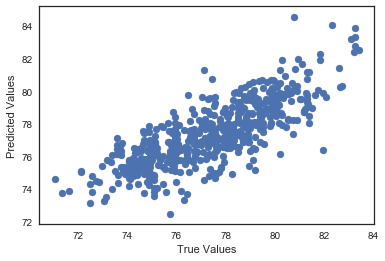

In [34]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## Wrapper Method

In [35]:
from sklearn.feature_selection import RFE

In [36]:
rfe = RFE(lm, n_features_to_select=10)
rfe.fit(features_selected_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=10, step=1, verbose=0)

In [37]:
def ranking(ranks, names, order=1):

    ranks = map(lambda x: round(x,2), ranks)
    return list(sorted(zip(ranks, names),reverse=True))

In [38]:
rankings = ranking(np.abs(lm.coef_), features_selected_train.columns)

In [39]:
rankings[:11]

[(1.2, 'Percent Smokers'),
 (0.73, 'Unemployment_rate_2010'),
 (0.68, 'log_PA Jan & July TOTAL Assist. Participation'),
 (0.61, 'Min Wage Min Wages Dummies'),
 (0.6, 'Jan & July TOTAL Assist. Participation'),
 (0.58, 'Jan & July Public Assist. Participation'),
 (0.54, 'Jan & July Non-Public Assist. Participation'),
 (0.44, 'log_NPA Jan & July Public Assist. Participation'),
 (0.35, 'Obesity'),
 (0.28, 'log_PA'),
 (0.26, 'Min Wage')]

In [40]:
[item[1] for item in rankings[0:11]]

['Percent Smokers',
 'Unemployment_rate_2010',
 'log_PA Jan & July TOTAL Assist. Participation',
 'Min Wage Min Wages Dummies',
 'Jan & July TOTAL Assist. Participation',
 'Jan & July Public Assist. Participation',
 'Jan & July Non-Public Assist. Participation',
 'log_NPA Jan & July Public Assist. Participation',
 'Obesity',
 'log_PA',
 'Min Wage']

In [41]:
final_columns = [item[1] for item in rankings[0:11]]

In [42]:
lm = linear_model.LinearRegression()
model = lm.fit(features_selected_train[final_columns], y_train)

In [43]:
features_selected_test = poly_X_test[final_columns]
y_pred = lm.predict(features_selected_test)

print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.1797652714974647
2.1197245054108604
1.4559273695520873


Text(0,0.5,'Predicted Values')

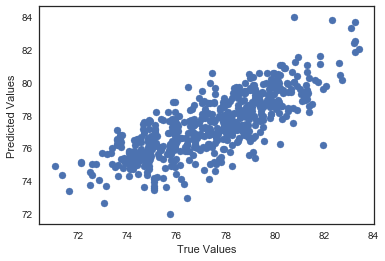

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

## OLS

In [275]:
target_df = pd.DataFrame(target)

# together = target_df.join(X_test_final, how="outer").dropna()
together = target_df.join(X_train_final, how="outer").dropna()


y = together['Life expectancy 2010']
predictors = together.drop('Life expectancy 2010', axis=1)


# doing same code as above, but passing in the dataframe we optimized in our filter methods section above
together_from_filter = target_df.join(features_selected_train, how='outer').dropna()

y_from_filter = together_from_filter['Life expectancy 2010']

predictors_from_filter = together_from_filter.drop('Life expectancy 2010', axis=1).dropna()



In [274]:
# SKLEARN WAY:

# from sklearn.linear_model import LinearRegression

# linreg = LinearRegression()
# linreg.fit(predictors, y)

# linreg.coef_
# linreg.intercept_


In [276]:
# STATSMODELS WAY:

import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors_int = sm.add_constant(predictors)
predictors_int
model = sm.OLS(y,predictors_int).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Life expectancy 2010   R-squared:                       0.691
Model:                              OLS   Adj. R-squared:                  0.683
Method:                   Least Squares   F-statistic:                     92.78
Date:                  Thu, 06 Dec 2018   Prob (F-statistic):               0.00
Time:                          20:44:24   Log-Likelihood:                -4096.6
No. Observations:                  2425   AIC:                             8309.
Df Residuals:                      2367   BIC:                             8645.
Df Model:                            57                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          76.3654      0.186    410.013      0.000      76.000      76.731
log_PA                                          0.0364      0.054      0.674      0.500      -0.069       0.142
log_NPA                                         0.2098      0.139      1.508      0.132      -0.063       0.483
log_TA                                         -0.3790      0.160     -2.372      0.018      -0.692      -0.066
Obesity                                        -0.2791      0.037     -7.573      0.000      -0.351      -0.207
Min Wage                                       -0.3331      0.037     -8.981      0.000      -0.406      -0.260
Percent Smokers                                -1.2635      0.033    -38.404      0.000      -1.328      -1.199
Jan & July Public Assist. Participation         0.0477      0.035      1.380      0.168      -0.020       0.116
Jan & July Non-Public Assist. Participation    -0.0158      0.036     -0.443      0.657      -0.086       0.054
Jan & July TOTAL Assist. Participation          0.0043      0.022      0.198      0.843      -0.038       0.047
Unemployment_rate_2010                         -0.6934      0.035    -19.855      0.000      -0.762      -0.625
Alaska                                          1.0497      0.424      2.474      0.013       0.218       1.882
Arizona                                         0.5312      0.383      1.388      0.165      -0.219       1.282
Arkansas                                        0.1274      0.247      0.515      0.606      -0.358       0.612
California                                      0.1996      0.219      0.912      0.362      -0.230       0.629
Colorado                                       -0.2217      0.202     -1.095      0.273      -0.619       0.175
Connecticut                                     0.5630      0.471      1.195      0.232      -0.361       1.487
Delaware                                        0.6781      0.957      0.709      0.479      -1.198       2.554
Florida                                        -0.2005      0.189     -1.060      0.289      -0.571       0.170
Georgia                                         0.2034      0.219      0.929      0.353      -0.226       0.633
Hawaii                                          2.3573      0.961      2.453      0.014       0.473       4.242
Idaho                                           1.3022      0.297      4.379      0.000       0.719       1.885
Illinois                                        0.8674      0.237      3.654      0.000       0.402       1.333
Indiana                                         1.3187      0.240      5.496      0.000       0.848       1.789
Iowa                                 

In [277]:
# OLS WAY WITH OPTIMIZED DATAFRAME OF FEATURES FROM FILTER METHODS SECTION

predictors_int = sm.add_constant(predictors_from_filter)
model = sm.OLS(y_from_filter,predictors_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Life expectancy 2010   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.8724
Date:                  Thu, 06 Dec 2018   Prob (F-statistic):              0.701
Time:                          20:49:29   Log-Likelihood:                -5558.3
No. Observations:                  2425   AIC:                         1.120e+04
Df Residuals:                      2383   BIC:                         1.144e+04
Df Model:                            41                                         
Covariance Type:              nonrobust                                         
=======================================================================================================================================================
                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                  76.1280      0.649    117.342      0.000      74.856      77.400
log_PA                                                                                  0.9523      0.456      2.087      0.037       0.058       1.847
log_NPA                                                                                 0.0693      0.254      0.273      0.785      -0.428       0.567
Obesity                                                                                -0.0098      0.055     -0.179      0.858      -0.117       0.098
Min Wage                                                                                0.0724      0.319      0.227      0.820      -0.553       0.698
Percent Smokers                                                                         0.0345      0.063      0.552      0.581      -0.088       0.157
Jan & July Public Assist. Participation                                                -5.9252      3.505     -1.690      0.091     -12.799       0.948
Jan & July Non-Public Assist. Participation                                             0.4231      0.640      0.661      0.508      -0.831       1.677
Jan & July TOTAL Assist. Participation                                                 -1.6807      0.995     -1.689      0.091      -3.632       0.270
Unemployment_rate_2010                                                                  0.0106      0.062      0.169      0.865      -0.112       0.133
log_PA^2                                                                                0.1595      0.105      1.525      0.127      -0.046       0.365
log_PA log_NPA                                                                         -0.8549      0.507     -1.685      0.092      -1.850       0.140
log_PA log_TA                                                                           0.6371      0.440      1.447      0.148      -0.226       1.501
log_PA Obesity                                                                          0.0147      0.077      0.190      0.849      -0.137       0.166
log_PA Min Wage                                                                        -0.0249      0.066     -0.377      0.706      -0.154       0.104
log_PA Percent Smokers                                                                 -0.0341      0.082     -0.414      0.679      -0.195       0.127
log_PA Jan & July Non-Public Assist. Participation                                     -2.5642      2.237     -1.146      0.252      -6.952       1.823
log_PA Jan & July TOT